In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
#I want to get the lat long of the houses - to do this I first need to concat the columns that make up the address
data['full_address'] = data['block'] + ' ' + data['street_name'] + ' ' + 'SINGAPORE'
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 SINGAPORE
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 SINGAPORE
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 SINGAPORE
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 SINGAPORE
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 SINGAPORE
...,...,...,...,...,...,...,...,...,...,...,...,...
85124,2020-11,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 10 months,555000.0,277 YISHUN ST 22 SINGAPORE
85125,2020-11,YISHUN,EXECUTIVE,606,YISHUN ST 61,04 TO 06,142.0,Apartment,1987,66 years 01 month,545000.0,606 YISHUN ST 61 SINGAPORE
85126,2020-11,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,145.0,Maisonette,1987,66 years 01 month,645000.0,877 YISHUN ST 81 SINGAPORE
85127,2020-11,YISHUN,EXECUTIVE,828,YISHUN ST 81,07 TO 09,145.0,Apartment,1988,66 years 03 months,660000.0,828 YISHUN ST 81 SINGAPORE


In [6]:
#Now I use Google API to get the lat/long
#This takes ages, and needs a valid API_Key - so I have saved the output and just load that for future use

#class API_Key(object):
#     api_file = open(r"C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/api_key.txt","r")
#     API_KEY = api_file.read()
#     api_file.close()
#     
#class Location(object):
#    
#    address = None
#    lat = None
#    lon = None
#    
#    def getlatlon(self):
#        api_key = API_Key()
#        url =  "https://maps.googleapis.com/maps/api/geocode/json?address=" + self.address.replace(' ', '%20') + "&key=" + api_key.API_KEY
#        uh = urllib.request.urlopen(url)
#        data = uh.read().decode()
#        js = json.loads(data)
#        try:
#            self.lat = js["results"][0]["geometry"]["location"]["lat"]
#            self.lon = js["results"][0]["geometry"]["location"]["lng"]
#        except:
#            self.lat = None
#            self.long = None
            
# =============================================================================
# #2. Get Location Coordinates from Address
# address_df = pd.DataFrame(data.full_address.unique(),columns = ['Address'])
# 
# address_df['LAT'] = None
# address_df['LON'] = None
# 
# for i in range(len(address_df)):
#     location = Location()
#     location.address = address_df.iat[i,0]
#     location.getlatlon()
#   
#     try:
#         address_df.iat[i, address_df.columns.get_loc("LAT")] = location.lat
#         address_df.iat[i, address_df.columns.get_loc("LON")] = location.lon
#     except Exception as e:
#         print(e)
#
# #Some of the lat and longs could'nt be found in google so make sure they are dropped
# address_df = address_df[address_df.LAT != None]  
#
# address_df.to_csv(r'C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/address_df.csv') 
# =======

address_df = pd.read_csv(r'C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/address_df.csv') 
address_df
#I have lost a lot of rows because all aparetments in a flat are now merged, and I got rid of

,Address,LAT,LON
0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827
1,108 ANG MO KIO AVE 4 SINGAPORE,1.370915,103.838246
2,602 ANG MO KIO AVE 5 SINGAPORE,1.380715,103.835302
3,465 ANG MO KIO AVE 10 SINGAPORE,1.366263,103.856997
4,601 ANG MO KIO AVE 5 SINGAPORE,1.381078,103.835136
...,...,...,...
8913,520B TAMPINES CTRL 8 SINGAPORE,1.357169,103.939733
8914,889C WOODLANDS DR 50 SINGAPORE,1.437802,103.792504
8915,889A WOODLANDS DR 50 SINGAPORE,1.437527,103.793399
8916,126 MARSILING RISE SINGAPORE,1.438168,103.779858


In [7]:
#Now I need to stick the data back together
pd.options.mode.chained_assignment = None
df = data.merge(address_df, left_on='full_address', right_on='Address')
df.drop(columns=['Address'], inplace=True)
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,LAT,LON
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827
1,2017-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827
2,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827
3,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827
4,2018-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827


In [8]:
import geopandas as gpd
shapefile = r'C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/AreaBoundry/MP14_PLNG_AREA_NO_SEA_PL.shp'
street_map = gpd.read_file(shapefile)
street_map.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."


<AxesSubplot:>

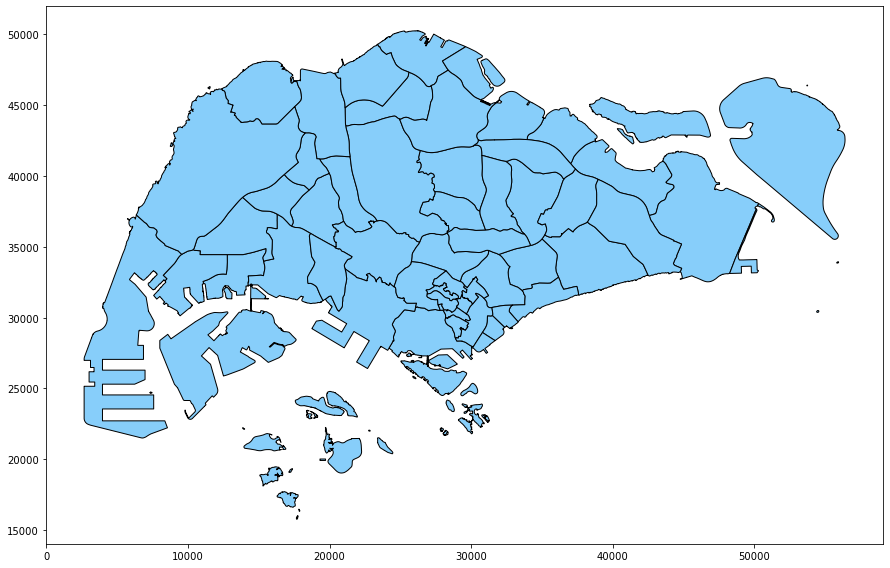

In [9]:
#Lets test out shp map
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, color = 'lightskyblue', edgecolor = 'black')

In [13]:
#Turn our 
df['geometry'] = gpd.points_from_xy(df.LON, df.LAT)
df['district'] = df['town']
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,LAT,LON,geometry,district
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827,POINT (103.8538267 1.3620328),ANG MO KIO
1,2017-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827,POINT (103.8538267 1.3620328),ANG MO KIO
2,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827,POINT (103.8538267 1.3620328),ANG MO KIO
3,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827,POINT (103.8538267 1.3620328),ANG MO KIO
4,2018-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,406 ANG MO KIO AVE 10 SINGAPORE,1.362033,103.853827,POINT (103.8538267 1.3620328),ANG MO KIO


In [14]:
avg_price = pd.pivot_table(df, values='resale_price', index=['district'], aggfunc=np.mean)
avg_price.reset_index(inplace=True)
avg_price.head()

,district,resale_price
0,ANG MO KIO,409553.338752
1,BEDOK,409946.639419
2,BISHAN,639370.279027
3,BUKIT BATOK,382064.620283
4,BUKIT MERAH,563852.158259


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

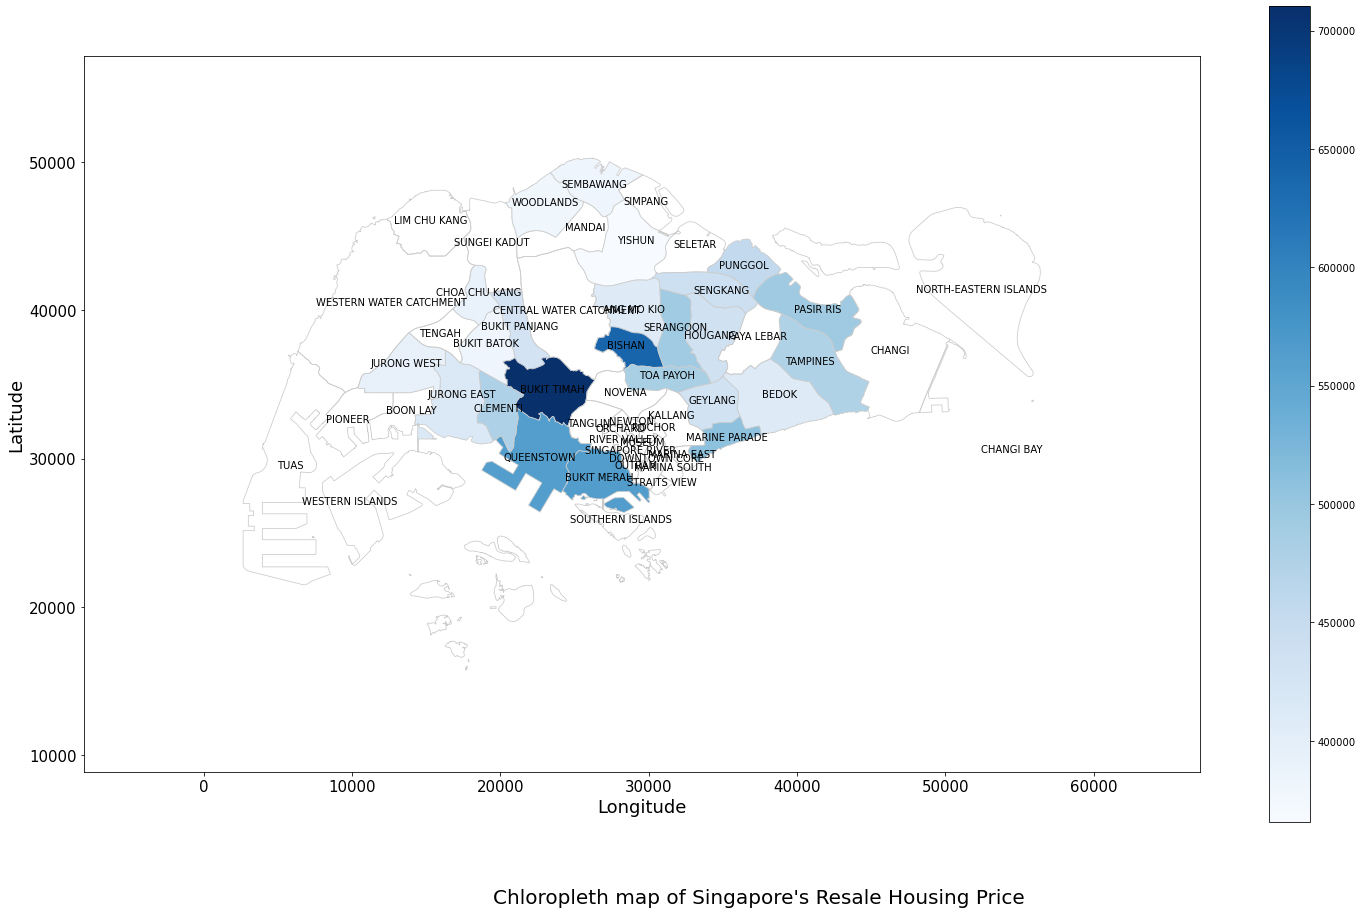

In [15]:
merged_df = street_map.set_index('PLN_AREA_N').join(avg_price.set_index('district'))
merged_df.reset_index(inplace=True)

fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

for idx, row in merged_df.iterrows():
    plt.annotate(text=row['PLN_AREA_N'], xy=row['coords'], horizontalalignment='center')
    
ax.margins(0.2, 0.2)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
txt='Chloropleth map of Singapore\'s Resale Housing Price'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='resale_price', ax=ax, legend=True, cmap='Blues', linewidth=0.8, edgecolor='0.8')